In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
from models import Sequential
from layers import Dense, Activation, Softmax
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from utils import load_model

In [3]:
np.random.seed(42)

In [4]:
def load_MNIST(one_hot=True, channel_first=True):
    """
    Load MNIST data
    :param one_hot:
    :return:
    """
    # Load data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Preprocess dataset
    # Normalization and reshaping of input.
    if channel_first:
        X_train = X_train.reshape(X_train.shape[0], 28*28)
        X_test = X_test.reshape(X_test.shape[0], 28*28)
    else:
        X_train = X_train.reshape(X_train.shape[0],  28*28)
        X_test = X_test.reshape(X_test.shape[0], 28*28)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    if one_hot:
        # For output, it is important to change number to one-hot vector.
        y_train = to_categorical(y_train, num_classes=10)
        y_test = to_categorical(y_test, num_classes=10)
        
    X_val = X_test[:1000]
    y_val = y_test[:1000]

    return X_train, y_train, X_val, y_val, X_test[1000:], y_test[1000:]

In [5]:
def after_epoch(model, epoch):
    model.save('checkpoints/mnist_checkpoints/{}'.format(epoch))

In [6]:
x_train, y_train, x_val, y_val, x_test, y_test = load_MNIST()

In [7]:
cl = Sequential()
cl.add(Dense(20, input_dim=784))
cl.add(Activation('relu', input_dim=20))

cl.add(Dense(20, input_dim=20))
cl.add(Activation('relu', input_dim=20))

cl.add(Dense(10, input_dim=20))
cl.add(Activation('relu', input_dim=10))
cl.add(Softmax(input_dim=10))

cl.compile(0.001, metric='accuracy')

In [8]:
hist = cl.fit(x_train, y_train, epochs=5, batch_size=32, x_val=x_test, y_val=y_test, after_epoch=after_epoch)

Started batch 0 of 1875 (epoch 0)
Started batch 375 of 1875 (epoch 0)
Started batch 750 of 1875 (epoch 0)
Started batch 1125 of 1875 (epoch 0)
Started batch 1500 of 1875 (epoch 0)
Loss of epoch 0 is 0.4164865469658041
train_accuracy = 0.9310833333333334
val_accuracy = 0.9307777777777778

Started batch 0 of 1875 (epoch 1)
Started batch 375 of 1875 (epoch 1)
Started batch 750 of 1875 (epoch 1)
Started batch 1125 of 1875 (epoch 1)
Started batch 1500 of 1875 (epoch 1)
Loss of epoch 1 is 0.22234472569535796
train_accuracy = 0.945
val_accuracy = 0.9442222222222222

Started batch 0 of 1875 (epoch 2)
Started batch 375 of 1875 (epoch 2)
Started batch 750 of 1875 (epoch 2)
Started batch 1125 of 1875 (epoch 2)
Started batch 1500 of 1875 (epoch 2)
Loss of epoch 2 is 0.18883160711121086
train_accuracy = 0.951
val_accuracy = 0.945

Started batch 0 of 1875 (epoch 3)
Started batch 375 of 1875 (epoch 3)
Started batch 750 of 1875 (epoch 3)
Started batch 1125 of 1875 (epoch 3)
Started batch 1500 of 1875 

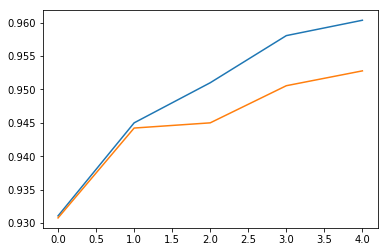

In [9]:
plt.plot(range(5), [hist[i]['train_accuracy'] for i in range(5)])
plt.plot(range(5), [hist[i]['val_accuracy'] for i in range(5)])

It looks we could benefit from more epochs of training. But let's just load epoch 3 to test the loading feature.

In [16]:
loaded = load_model('checkpoints/mnist_checkpoints/3')
loaded.compile(metric='accuracy')

In [17]:
loaded.evaluate(x_val, y_val)

0.951

It seems to be working. Now, let's see the test set performance.

In [18]:
loaded.evaluate(x_test, y_test)

0.9505555555555556

Looks good enough. We can conclude that the library Cauchy works.